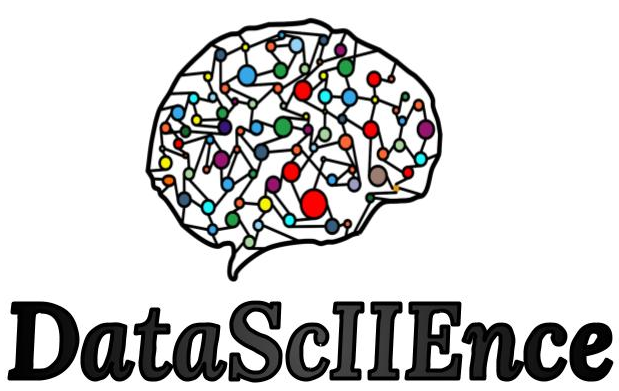

# Neural Networks

## Deep Learning

* Le ```Deep Learning``` ou apprentissage en profondeur est un ensemble de méthodes de ```Machine Learning``` tentant de modéliser avec un haut niveau d’abstraction des données grâce à des architectures composées de différentes transformations non linéaires.

* Parmi les principales architecutres de ```Deep Learning``` on retrouve les ```Neural Networks``` ou réseaux neuronaux en français.

## Neural Networks Architecture

* Un ```Neural Networks``` est composé de différents ```layers``` (couches en français) on en distingue 3 types :

  * ```Inputer layer``` : reçoit les données

  * ```Output layer``` : renvoie les résultats

  * ```Hidden layer``` : effectue le traitement

![net](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)

## Neurons Architecture

* Chaque ```layer``` est composé de plusieurs ```neurons``` qui sont prennet un ensemble de valeurs en entrée.

* Un ```neuron``` va multiplier ces valeurs d'entrée par les poids respectifs, puis appliquer une combinaison linéaire sur ces entrées pondérées.

* Sur le résulat de cette combinaison linéaire, appellé ```somme pondérée```, on va appliquer la ```fonction d'activation```, elle ne s'active que si cette somme est supérieur au ```seuil d'activation``` du neurone.

* Enfin le neurone retourne une ```valeur d'activation``` qui correspond à quel point il a été activé par ses entrées.

![neuralnet](https://upload.wikimedia.org/wikipedia/commons/5/58/ArtificialNeuronModel_francais.png)

## Neural Networks Results

* Une fois un ```Neural Network``` entraîné, il suffit de lui fournir des données en entrée et de regarder ce qu'il retourne en sortie.

* Pour une classification par exemple la neurone la plus activée correspondera à sa prédiction.

![minst](https://thumbs.gfycat.com/ActiveCourteousAmericanindianhorse-size_restricted.gif)

## Types of Neural Networks

* Il existe différents types de réseaux de neurones parmi les plus utilisés actuellement on peut en citer deux :

  * Convolutional Neural Networks

  * Recurrent Neural Networks

# Recurrent Neural Networks

## RNN Architecture

* Les ```RNN``` sont les plus efficaces pour gérer des entrées de différentes tailles étant donné qu’ils possèdent une mémoire court terme.

* Ils permettent aussi une meilleure compréhension du contexte puisqu’ils peuvent traiter des paquets de données quasi simultanément.

![rnn](https://miro.medium.com/max/1400/1*3ltsv1uzGR6UBjZ6CUs04A.jpeg)

## Backpropagation

* Quand le modèle fait une prédiction, il y'a une petite marge d'erreur qui correspond à l'activation de neurones qui ne devraient pas l'être.

* Pour s'entraîner un ```RNN``` se base sur la ```backpropagation```, qui consiste à mettre à jour les poids de chaque neurone de la dernière couche vers la première en se basant sur l'écart entre le résultat souhaité et le résultat obtenu.

![back](https://elecrock.com/wp-content/uploads/2021/11/BitesizedWeeBlacklemur-max-1mb.gif)

## Vanishing Gradient Problem

* Malheureusement, la mémoire à court terme d'un ```RNN``` n’a pas une durée de vie suffisante ce problème très célèbre est appellé le ```Vanishing/Exploding Gradient Problem```.

* En utilisant la rétropropagation, un ```RNN``` peut retracer les dépendances arbitraires qu’il trouve dans les données d’entrée.

* Cependant les gradients à long terme qui sont rétropropagés peuvent tendre vers zéro (on dit qu’ils ```disparaissent```) ou peuvent tendre vers l’infini (on dit qu’ils ```explosent```). Dans les deux cas on perd l’information qu’on voulait garder en mémoire.

![vegp](https://miro.medium.com/max/1400/1*_YRWJr-jF7tKnmUq-e3ltw.png)

* Il existe des sous-types de ```RNN``` qui corrige ce genre de problème comme les réseaux ```Long Short-Term Memmory```.

* Les ```LSTM``` contiennent une mémoire capable de durer assez longtemps pour qu’on la qualifie de mémoire longue à court terme.

![lstm](https://www.researchgate.net/publication/341131167/figure/fig1/AS:887489082445828@1588605294853/RNN-v-s-LSTM-a-RNNs-use-their-internal-state-memory-to-process-sequences-of-inputs.jpg)

# Convolutional Neural Networks

### CNN Architecture

* Le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux.

* Ils consistent en un empilage de plusieurs couches, dont le but est de prétraiter de petites quantités d'informations.

## Convolution Layer

* Les couches de convolution applique un kernel sur un input pour le modifier.

![](https://blogs.nvidia.com/wp-content/uploads/2018/09/convolution.png)

## Pooling Layer

* Les couches de Pooling servent à réduire la taille des données au fur et à mesure que l'on avance dans le réseau.

![](https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.png)

# CNN Application

![](https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/architecture.png?raw=true)

## Filtres

* Avant de nous attaquer au ```CNN``` il est important de comprendre ce qu'on fait en terme de traitement d'image.

* On va notamment s'intéresser dans cette première partie à la notion de ```kernel``` (noyau en français) appliqué sur une image.

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

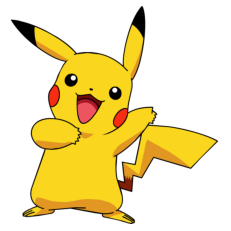

In [2]:
url_pikachu = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/pikachu.png?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

* Une image c'est avant tout une matrice !

In [3]:
res = cv2.resize(image_pikachu , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')

255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  2

* Cette matrice est enfait une image d'un pikachu

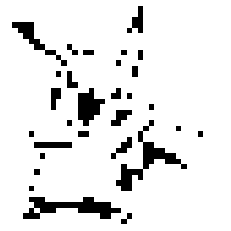

In [4]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

* On garde l'image en noir et blanc

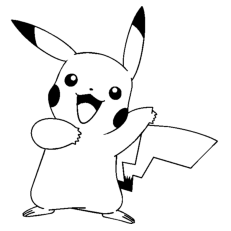

In [5]:
img_bw = cv2.imdecode(image_array_pikachu, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

* **Identity Kernel** : ne changera rien parce que chaque pixel garde sa valeur initial

In [6]:
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


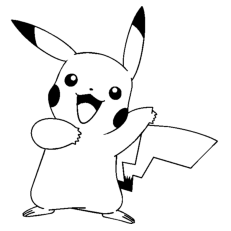

In [7]:
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

* **Vertical Kernel** : détection des contours 

In [8]:
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


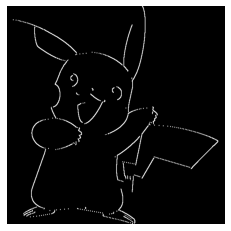

In [9]:
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

* **Horizontal Kernel** : détection des contours 

In [10]:
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


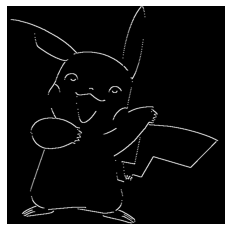

In [11]:
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

## Convolution

* La convolution est une opération mathématique qui prend deux objets en argument.

* Pour les matrices par exemple elle va inverser l'une et décaler l'autre puis calcule l’intégrale du produit.

![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif)

La convolution est définit par cette fonction :

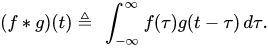

Dans notre cas on va considérer l'opération matricielle suivante :

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/0f0005a6520eaab36f9b30520b640663d669d891)

## Dataset Pokémon

* On importe notre dataset

In [13]:
import pathlib
import zipfile

with zipfile.ZipFile('/content/pokemon-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/pokemon-dataset/dataset')

* On affiche le nombre d'image dans notre dataset

In [14]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

174


## Preprocessing

* On envoie les images 3 par 3 dans notre modèle

In [15]:
batch_size = 3

* On fais des images carrés de taille 200

In [16]:
img_height = 200
img_width = 200

* On construit notre dataset d'entraînement

In [17]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 174 files belonging to 2 classes.
Using 140 files for training.


* On construit notre dataset de validation

In [18]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 174 files belonging to 2 classes.
Using 34 files for validation.


* On affiche nos classes qu'on doit classifier

In [19]:
class_names = val_data.class_names
print(class_names)

['pikachu', 'rondoudou']


* On affiche un exemple de batch

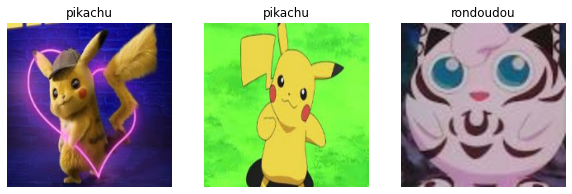

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model building

* On construit le réseau couche par couche

In [21]:
model = tf.keras.Sequential([
    # rescaling layer (normalization of the images)
    layers.experimental.preprocessing.Rescaling(1./255),
    # convolution (filtering images with kernel) 
    layers.Conv2D(128,4, activation='relu'),
    # max pooling layers (reducing size of images)
    layers.MaxPooling2D(),
    # convolution (filtering images with kernel) 
    layers.Conv2D(64,4, activation='relu'),
    # max pooling layers (reducing size of images)
    layers.MaxPooling2D(),
    # convolution (filtering images with kernel) 
    layers.Conv2D(32,4, activation='relu'),
    # max pooling layers (reducing size of images)
    layers.MaxPooling2D(),
    # convolution (filtering images with kernel) 
    layers.Conv2D(16,4, activation='relu'),
    # max pooling layers (reducing size of images)
    layers.MaxPooling2D(),
    # flatten layer (construction of a vector from the matrix)
    layers.Flatten(),
    # dense layer (64 neurons layers)
    layers.Dense(64, activation='relu'),
    # dense layer (33 neurons layers)
    layers.Dense(33, activation='softmax')
])

* On compile le modèle

In [22]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

## Model training

* On entraîne le modèle sur notre dataset

In [ ]:
model.fit( 
  train_data,
  validation_data=val_data,
  epochs=20
)

* On affiche les couches du modèle et le nombre de paramères

In [24]:
model.summary(expand_nested=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

* On affiche visuellement notre réseau

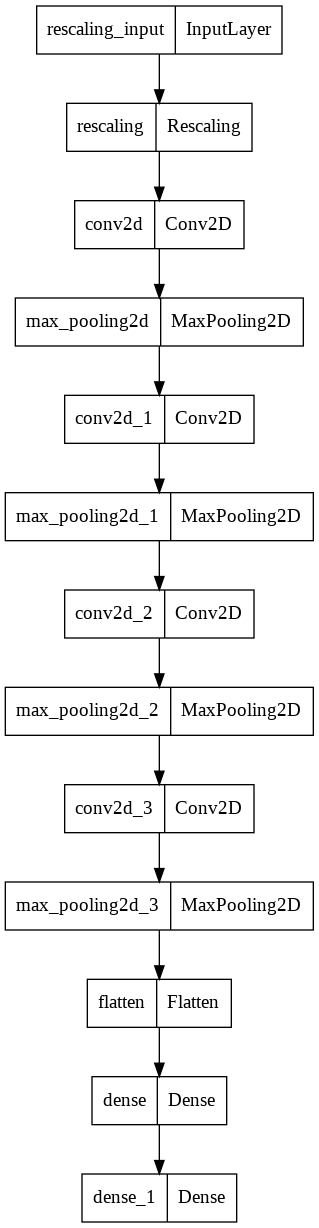

In [25]:
tf.keras.utils.plot_model(model)

## Model predictions

* On prédit le pokemon sur l'image avec notre modèle

In [ ]:
from google.colab import files
file_to_predict = '/content/datasets/pokemon-dataset/dataset/pikachu/download (1).jpg'
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe pokemon in the image is a', class_names[res])

In [ ]:
from google.colab import files
file_to_predict = '/content/datasets/pokemon-dataset/dataset/rondoudou/download (31).jpg'
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe pokemon in the image is a', class_names[res])

## Model explainabilty

* On affiche les filtres que le modèle a générer puis utliser pour ses prédictions

In [ ]:
def display_image_filtered(name_image, model, layer_name,image):
    inp= model.inputs 
    out1= model.get_layer(layer_name).output  
    feature_map_1= Model(inputs= inp, outputs= out1)  
    img=cv2.resize(image,(200,200))              
    input_img= np.expand_dims(img, axis=0)      
    f=feature_map_1.predict(input_img) 
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')        
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])

In [ ]:
num = 33
image = image_pikachu
for i in range(0,4):
  if num == 0 and i==0:
    print('-----------------------------------------------------')
    print(f'{i+1}st convolutionnal layer')
    display_image_filtered(name,model,f'conv2d',image)
    print('--------')
    print(f'{i-1}nd Pooling')
    display_image_filtered(name,model,f'max_pooling2d',image)
    print('-----------------------------------------------------')
  else:
    print('-----------------------------------------------------')
    print(f'{i+1}st convolutionnal layer')
    display_image_filtered(name,model,f'conv2d_{num+i}',image)
    print('--------')
    print(f'{i+1}nd Pooling')
    display_image_filtered(name,model,f'max_pooling2d_{num+i-1}',image)
    print('-----------------------------------------------------')